In [25]:
############################################################
# Import Dependencies
############################################################


import pandas as pd
import matplotlib.pyplot as plt


In [26]:
##########################################
# Read CSV Files
##########################################

# Sensor names, labels for SB 35W from 694 to 494
sensor_list = 'Station_Keys/Southbound_35W_StationNames.csv'
SensorList = pd.read_csv(sensor_list)
SensorDF = pd.DataFrame(SensorList)

# Oct_data from a single day showing SB 35W Traffic
oct_data = ('Archived_Data_MNDOT/SB35W_Oct_3_18_Volume_Sum_RushHours.csv')
Oct_cvs = pd.read_csv(oct_data)
OctDF = pd.DataFrame(Oct_cvs)

#Sensor names, labels for NB 35W from 494 to 694
nbsensor_list = 'Station_Keys/Northbound_35W_StationNames.csv'
nbSensorList = pd.read_csv(nbsensor_list)
NBSensorDF = pd.DataFrame(nbSensorList)

# Oct_data from a single day showing NB 35W Traffic
nboct_data = 'Archived_Data_MNDOT/NB35W_Oct_3_18_Volume_Sum_RushHours.csv'
nboct_csv = pd.read_csv(nboct_data)
NBOctDF = pd.DataFrame(nboct_csv)

mpls_csv = 'Station_Keys/MPLS_Route_StationNames.csv'
mpls_csvR = pd.read_csv(mpls_csv)
mpls_DF = pd.DataFrame(mpls_csvR)


mpls_data_csv = 'Archived_Data_MNDOT/MPLS_Entry_Exit_Volume_SpecificDates.csv'
dtypes = {'col1': 'str', 'col2': 'str', 'col3': 'str', 'col4': 'str', 'col5':'str', 'col6':'float', 'col7':'float'}
parse_dates = ['Date']
mpls_data = pd.read_csv(mpls_data_csv, sep=',', dtype=dtypes, parse_dates=parse_dates)
mpls_dataDF = pd.DataFrame(mpls_data)
mpls_dataDF.head()

Sensor       Date  Volume       Event Label          St Label       Lat  \
0   S125 2018-10-03   27018  October Wed 2018   WB 94 from dwtn  44.99888   
1   S137 2018-10-03   35116  October Wed 2018     EB 94 to dwtn  44.99898   
2     S2 2018-10-03       0  October Wed 2018  SB 35W from dwtn  44.96259   
3   S285 2018-10-03   74299  October Wed 2018  WB 394 from dwtn  44.97002   
4   S286 2018-10-03   68473  October Wed 2018    EB 394 to dwtn  44.96977   

        Lng  
0 -93.28266  
1 -93.28297  
2 -93.26997  
3 -93.30761  
4 -93.30786

In [20]:
############################################################
# Merge CSV Files to create South Bound 35W Data (SB_Data)
############################################################

#Merged SB 35W Data and Labels
SB_Data = pd.merge(SensorDF, OctDF, how = 'left', on = '1')

#Merged NB 35W Data and Labels
NB_Data = pd.merge(NBSensorDF, NBOctDF, how = 'left', on = '1')


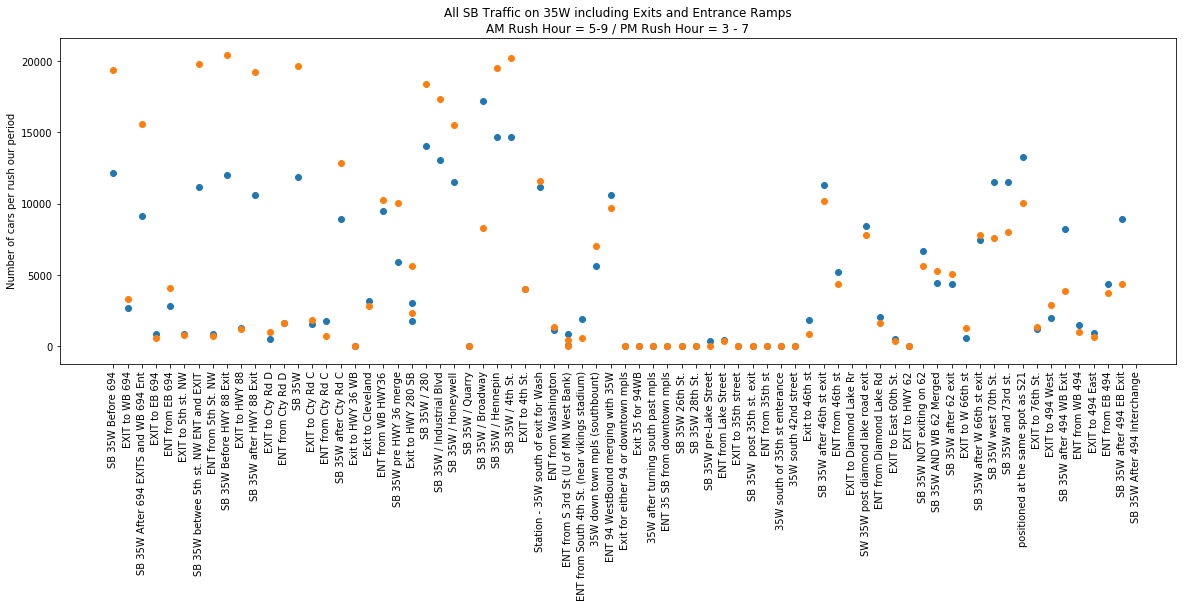

In [5]:
##################################
# SB 35W All Traffic Scatter Plot

# This is the Total Volume of Traffic for an AM Rush Hour and PM Rush Hour

# AM Rush Hour = 5:00 AM - 9:00 AM
# PM Rush Hour = 3:00 PM - 7:00 PM
##################################

y1 = SB_Data['AM Rush']
y2 = SB_Data['PM Rush']
X_Axis = SB_Data['Label']

# Figure Settings
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)

# Figure Labels
plt.title("All SB Traffic on 35W including Exits and Entrance Ramps\nAM Rush Hour = 5-9 / PM Rush Hour = 3 - 7")
plt.ylabel("Number of cars per rush our period")

# Scatter Plot
plt.scatter(X_Axis, y1)
plt.scatter(X_Axis, y2)

plt.show()

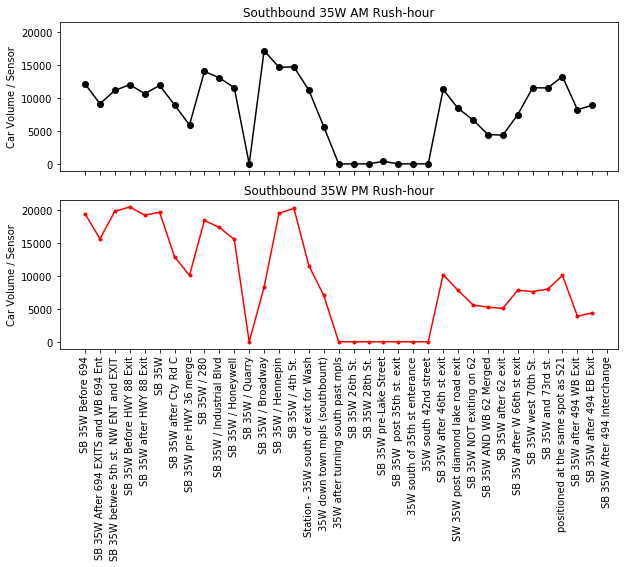

In [6]:
##########################################
#Groupby to display flowing traffic only
##########################################

SB35W_Flow = SB_Data.loc[SB_Data['Type']=='Flow']

# Inputs
y1 = SB35W_Flow ['AM Rush']
y2 = SB35W_Flow['PM Rush']
x1 = SB35W_Flow['Label']
x2 = SB35W_Flow['Label']

# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharex = True, sharey=True, figsize=(10,6))

# AM Rush-hour
ax1.plot(x1, y1, 'ko-')
ax1.set(title='Southbound 35W AM Rush-hour', ylabel='Car Volume / Sensor')

# PM Rush-hour
ax2.plot(x2, y2, 'r.-')
ax2.set(title='Southbound 35W PM Rush-hour', ylabel='Car Volume / Sensor')

# Rotate xticks (reminder both images are sharing the X-axis labels)
plt.xticks(rotation=90)

plt.show()

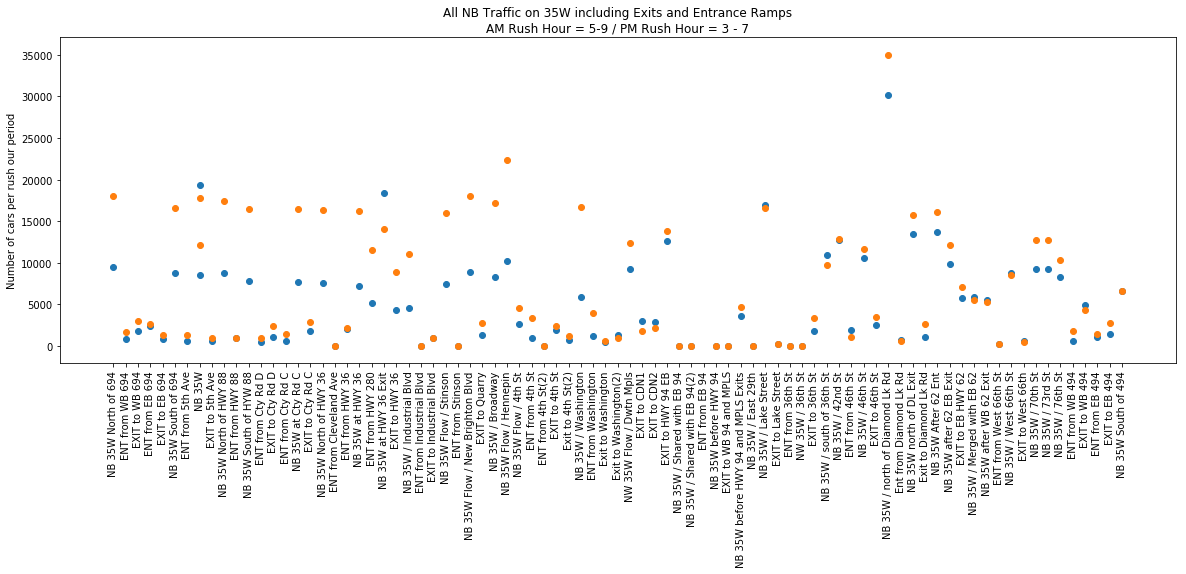

In [7]:
##########################################
# NB 35W All Traffic Scatter Plot
##########################################

y1 = NB_Data['AM_RushHour']
y2 = NB_Data['PM_RushHour']
X_Axis = NB_Data['Label']

# Figure Settings
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)

# Figure Labels
plt.title("All NB Traffic on 35W including Exits and Entrance Ramps\nAM Rush Hour = 5-9 / PM Rush Hour = 3 - 7")
plt.ylabel("Number of cars per rush our period")

# Scatter Plot
plt.scatter(X_Axis, y1)
plt.scatter(X_Axis, y2)

plt.show()

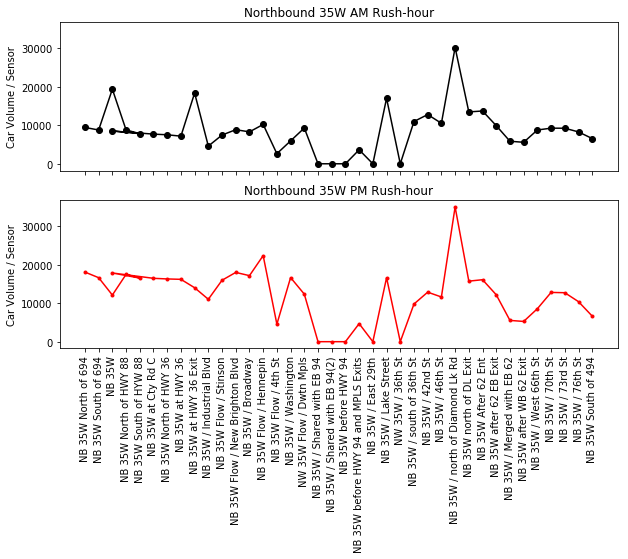

In [8]:
##########################################
#Groupby to display northbound flowing traffic only
##########################################

NB35W_Flow = NB_Data.loc[NB_Data['Type']=='Flow']

# Inputs
y1 = NB35W_Flow ['AM_RushHour']
y2 = NB35W_Flow['PM_RushHour']
x1 = NB35W_Flow['Label']
x2 = NB35W_Flow['Label']

# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharex = True, sharey=True, figsize=(10,6))

# AM Rush-hour
ax1.plot(x1, y1, 'ko-')
ax1.set(title='Northbound 35W AM Rush-hour', ylabel='Car Volume / Sensor')

# PM Rush-hour
ax2.plot(x2, y2, 'r.-')
ax2.set(title='Northbound 35W PM Rush-hour', ylabel='Car Volume / Sensor')

# Rotate xticks (reminder both images are sharing the X-axis labels)
plt.xticks(rotation=90)

plt.show()

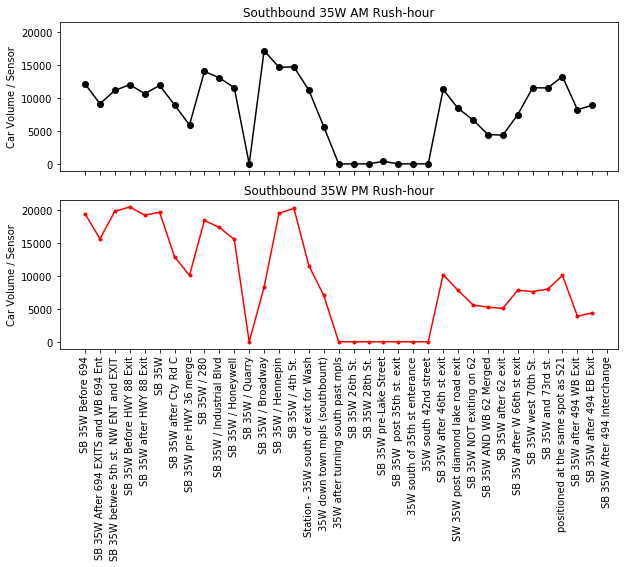

In [29]:
##########################################
#Groupby to display southbound flowing traffic only
##########################################

SB35W_Flow = SB_Data.loc[SB_Data['Type']=='Flow']

# Inputs
y1 = SB35W_Flow ['AM Rush']
y2 = SB35W_Flow['PM Rush']
x1 = SB35W_Flow['Label']
x2 = SB35W_Flow['Label']

# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharex = True, sharey=True, figsize=(10,6))

# AM Rush-hour
ax1.plot(x1, y1, 'ko-')
ax1.set(title='Southbound 35W AM Rush-hour', ylabel='Car Volume / Sensor')

# PM Rush-hour
ax2.plot(x2, y2, 'r.-')
ax2.set(title='Southbound 35W PM Rush-hour', ylabel='Car Volume / Sensor')

# Rotate xticks (reminder both images are sharing the X-axis labels)
plt.xticks(rotation=90)

plt.show()

In [49]:
######
#Which on - off ramps have the greatest volume of traffic?
################

NB35Wonoff = NB_Data.loc[NB_Data['Type']!='Flow']
nb35OnOff = pd.DataFrame(NB35Wonoff[["Label", "Type", "PM_RushHour"]])
NB_pmRushOnOff = nb35OnOff.sort_values(by='PM_RushHour', ascending=False)
NB_pmRushOnOff.head()

Label  Type  PM_RushHour
46  EXIT to HWY 94 EB  Exit      13824.0
22   ENT from HWY 280    On      11584.0
24     EXIT to HWY 36  Exit       8880.0
70  EXIT to EB HWY 62  Exit       7072.0
80     EXIT to WB 494  Exit       4362.0

In [54]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

######
#Which on - off ramps have the greatest volume of traffic?
################

NB35Wonoff = NB_Data.loc[NB_Data['Type']!='Flow']
nb35OnOff = pd.DataFrame(NB35Wonoff[["Label", "Type", "PM_RushHour"]])
NB_pmRushOnOff = nb35OnOff.sort_values(by='PM_RushHour', ascending=False)

# NB35Wonoffam = NB_Data.loc[NB_Data['Type']!='Flow']
nb35OnOffam = pd.DataFrame(NB35Wonoff[["Label", "Type", "AM_RushHour"]])
NB_amRushOnOff = nb35OnOffam.sort_values(by='AM_RushHour', ascending=False)

display_side_by_side(NB_pmRushOnOff,NB_amRushOnOff)

Label 
 Type 
 PM_RushHour 
 
 
 
 
 46 
 EXIT to HWY 94 EB 
 Exit 
 13824.0 
 
 
 22 
 ENT from HWY 280 
 On 
 11584.0 
 
 
 24 
 EXIT to HWY 36 
 Exit 
 8880.0 
 
 
 70 
 EXIT to EB HWY 62 
 Exit 
 7072.0 
 
 
 80 
 EXIT to WB 494 
 Exit 
 4362.0 
 
 
 40 
 ENT from Washington 
 On 
 3952.0 
 
 
 63 
 EXIT to 46th St 
 Exit 
 3492.0 
 
 
 58 
 EXIT to 36th St 
 Exit 
 3364.0 
 
 
 35 
 ENT from 4th St 
 On 
 3313.0 
 
 
 2 
 EXIT to WB 694 
 Exit 
 3022.0 
 
 
 17 
 EXIT to Cty Rd C 
 Exit 
 2875.0 
 
 
 82 
 EXIT to EB 494 
 Exit 
 2821.0 
 
 
 31 
 EXIT to Quarry 
 Exit 
 2806.0 
 
 
 3 
 ENT from EB 694 
 On 
 2696.0 
 
 
 67 
 Exit to Diamond Lk Rd 
 Exit 
 2684.0 
 
 
 37 
 EXIT to 4th St 
 Exit 
 2426.0 
 
 
 13 
 EXIT to Cty Rd D 
 Exit 
 2398.0 
 
 
 20 
 ENT from HWY 36 
 On 
 2159.0 
 
 
 45 
 EXIT to CDN2 
 Exit 
 2155.0 
 
 
 44 
 EXIT to CDN1 
 Exit 
 1797.0 
 
 
 79 
 ENT from WB 494 
 On 
 1764.0 
 
 
 1 
 ENT from WB 694 
 On 
 1662.0 
 
 
 81 
 ENT from EB 494 
 On 
 1485.0 
 
 
 15 
 ENT from Cty Rd C 
 On 
 1408.0 
 
 
 4 
 EXIT to EB 694 
 Exit 
 1342.0 
 
 
 6 
 ENT from 5th Ave 
 On 
 1321.0 
 
 
 38 
 Exit to 4th St(2) 
 Exit 
 1229.0 
 
 
 61 
 ENT from 46th St 
 On 
 1103.0 
 
 
 8 
 EXIT to 5th Ave 
 Exit 
 1006.0 
 
 
 27 
 EXIT to Industrial Blvd 
 Exit 
 985.0 
 
 
 12 
 ENT from Cty Rd D 
 On 
 982.0 
 
 
 10 
 ENT from HWY 88 
 On 
 980.0 
 
 
 42 
 Exit to Washington(2) 
 Exit 
 963.0 
 
 
 65 
 Ent from Diamond Lk Rd 
 On 
 645.0 
 
 
 41 
 Exit to Washington 
 Exit 
 594.0 
 
 
 75 
 EXIT to West 66th 
 Exit 
 547.0 
 
 
 73 
 ENT from West 66th St 
 On 
 300.0 
 
 
 55 
 EXIT to Lake Street 
 Exit 
 189.0 
 
 
 26 
 ENT from Industrial Blvd 
 On 
 30.0 
 
 
 19 
 ENT from Cleveland Ave 
 On 
 0.0 
 
 
 51 
 EXIT to WB 94 and MPLS 
 Exit 
 0.0 
 
 
 56 
 ENT from 36th St 
 On 
 0.0 
 
 
 29 
 ENT from Stinson 
 On 
 0.0 
 
 
 36 
 ENT from 4th St(2) 
 On 
 0.0 
 
 
 49 
 ENT from EB 94 
 On 
 NaN 
 
 
 
 
 
 
 Label 
 Type 
 AM_RushHour 
 
 
 
 
 46 
 EXIT to HWY 94 EB 
 Exit 
 12572.0 
 
 
 70 
 EXIT to EB HWY 62 
 Exit 
 5771.0 
 
 
 22 
 ENT from HWY 280 
 On 
 5150.0 
 
 
 80 
 EXIT to WB 494 
 Exit 
 4990.0 
 
 
 24 
 EXIT to HWY 36 
 Exit 
 4317.0 
 
 
 44 
 EXIT to CDN1 
 Exit 
 3014.0 
 
 
 45 
 EXIT to CDN2 
 Exit 
 2838.0 
 
 
 63 
 EXIT to 46th St 
 Exit 
 2493.0 
 
 
 3 
 ENT from EB 694 
 On 
 2409.0 
 
 
 20 
 ENT from HWY 36 
 On 
 2021.0 
 
 
 37 
 EXIT to 4th St 
 Exit 
 1942.0 
 
 
 61 
 ENT from 46th St 
 On 
 1909.0 
 
 
 17 
 EXIT to Cty Rd C 
 Exit 
 1799.0 
 
 
 2 
 EXIT to WB 694 
 Exit 
 1788.0 
 
 
 58 
 EXIT to 36th St 
 Exit 
 1775.0 
 
 
 82 
 EXIT to EB 494 
 Exit 
 1463.0 
 
 
 31 
 EXIT to Quarry 
 Exit 
 1318.0 
 
 
 42 
 Exit to Washington(2) 
 Exit 
 1299.0 
 
 
 40 
 ENT from Washington 
 On 
 1167.0 
 
 
 13 
 EXIT to Cty Rd D 
 Exit 
 1126.0 
 
 
 67 
 Exit to Diamond Lk Rd 
 Exit 
 1110.0 
 
 
 81 
 ENT from EB 494 
 On 
 1043.0 
 
 
 10 
 ENT from HWY 88 
 On 
 1025.0 
 
 
 35 
 ENT from 4th St 
 On 
 945.0 
 
 
 27 
 EXIT to Industrial Blvd 
 Exit 
 911.0 
 
 
 4 
 EXIT to EB 694 
 Exit 
 862.0 
 
 
 1 
 ENT from WB 694 
 On 
 814.0 
 
 
 65 
 Ent from Diamond Lk Rd 
 On 
 720.0 
 
 
 38 
 Exit to 4th St(2) 
 Exit 
 691.0 
 
 
 15 
 ENT from Cty Rd C 
 On 
 653.0 
 
 
 6 
 ENT from 5th Ave 
 On 
 636.0 
 
 
 8 
 EXIT to 5th Ave 
 Exit 
 623.0 
 
 
 79 
 ENT from WB 494 
 On 
 587.0 
 
 
 75 
 EXIT to West 66th 
 Exit 
 571.0 
 
 
 41 
 Exit to Washington 
 Exit 
 502.0 
 
 
 12 
 ENT from Cty Rd D 
 On 
 443.0 
 
 
 55 
 EXIT to Lake Street 
 Exit 
 278.0 
 
 
 73 
 ENT from West 66th St 
 On 
 257.0 
 
 
 51 
 EXIT to WB 94 and MPLS 
 Exit 
 0.0 
 
 
 56 
 ENT from 36th St 
 On 
 0.0 
 
 
 29 
 ENT from Stinson 
 On 
 0.0 
 
 
 26 
 ENT from Industrial Blvd 
 On 
 0.0 
 
 
 19 
 ENT from Cleveland Ave 
 On 
 0.0 
 
 
 36 
 ENT from 4th St(2) 
 On 
 0.0 
 
 
 49 
 ENT from EB 94 
 On 
 NaN